<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Hands-On 3</i></font></h1>

# Section 1.1: The logistic regression model

Machine learning algorithms can be categorized into two categories:

1. Generative algorithms, that estimate joint probability distribution $P(x,y)$ (often they model $P(x|y)$ and $P(y)$ separately).
2. Discriminative algorithms, that model conditional probability distribution of each class $P(y|x)$
-------------------------------------------------------------------------------------------------------------------------------
Logistic regression is a discriminative algorithm and invokes a standard procedure:
1.   Define a *model* of how inputs relate to outputs.
2.   Adjust the parameters to maximize (log) probability of your data given your model(MLE)

The fundamental input/output equation of logistic regression is:


$$ \hat{y} \equiv p(y=1|x,\theta) = \sigma(\theta^Tx)$$

Note that we interpret the output of logistic regression, $\hat{y}$, as the **probability that y = 1** given inputs $x$ and parameters $\theta$.

Here $\sigma()$ is a "squashing" function called the **sigmoid function** or **logistic function**. Its output is in the range $0 \leq y \leq 1$. It looks like this:

$$\sigma(z) = \frac{1}{1 + \textrm{exp}(-z)}$$

Recall that $z = \theta^T x$. The parameters decide whether $\theta^T x$ will be very negative, in which case $\sigma(\theta^T x)\approx 0$, or very positive, meaning  $\sigma(\theta^T x)\approx 1$.


# Section 1.2: Is the logistic regression originaly a classifier?
The Logistic Regression itself simply models probability of output in terms of input and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier. For instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other. This is a common way to make a binary classifier. [This video](https://www.youtube.com/watch?v=yIYKR4sgzI8) gives you a good understanding of the concepts covered in this notebook. 



# Section 1.3: Linear Regression VS  Logistic Regression


1.Although the outcome of linear regression is used as probabilities, there is no guarantee it stays between zero to one. But logistic function produces actual probabilities and has bounded output.

2.In the case of linear regression, your response variable is continuous. For instance, weight, height, number of hours, etc. While in logistic regression is used when the response variable is categorical in nature. For instance, yes/no, true/false, red/green/blue, 1st/2nd/3rd/4th, etc.

3.Linear regression uses the ordinary least squares method to minimize the errors and arrive at the best possible fit, while logistic regression uses the maximum likelihood method to arrive at the solution.


<center>
<img src="images/linear_vs_logistic_regression_edxw03.png" alt="linear vs logistic regression">
</center>

# Section 2.1: Simple, practical example

In this part, we go through a simple binary classification example step by step. Here we want to classify two type of flowers based on their physical feartures. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
Y = iris.target
df = pd.DataFrame(np.c_[X, Y], columns=np.append(iris['feature_names'], ['target']))

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


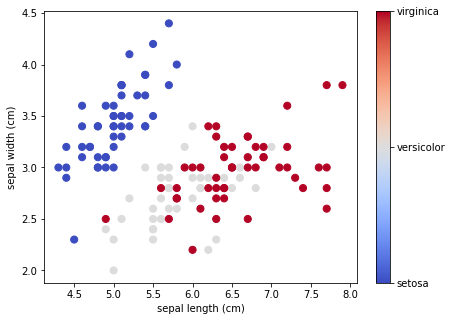

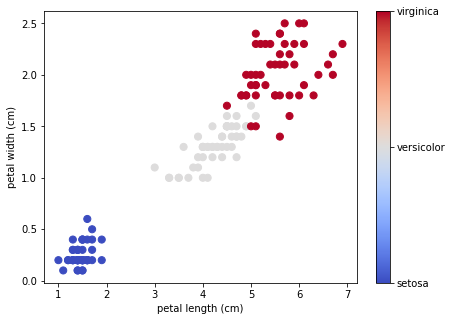

In [6]:
for i in [0,2]:
    plt.figure(figsize=(7, 5)) 
    p = plt.scatter(X[:, i], X[:,i+1], c=Y, cmap=plt.cm.coolwarm, s=50)
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[i+1])
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.show()

In [7]:
final_df = df[df['target'] != 2] # we omit the Virginica class as we want to have a binary classification problem

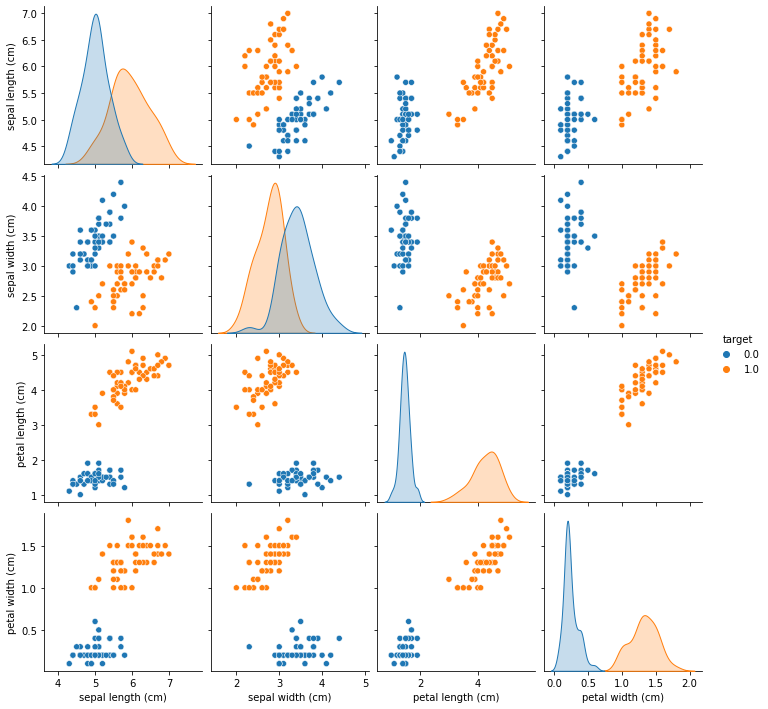

In [8]:
sns.pairplot(final_df, hue='target', height=2.5) 
plt.show()

If the feature space is small like here that we have 4 physical features it is a good idea to visualize them to check if any abnormality exists or not. 

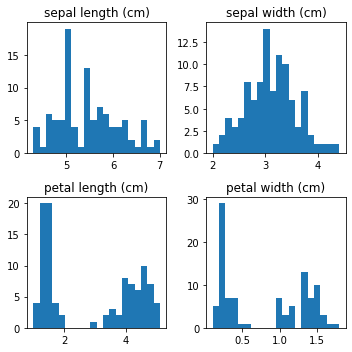

In [9]:
f,a = plt.subplots(2,2,figsize=(5,5))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(final_df[iris.feature_names[idx]],bins=20)
    ax.set_title(iris.feature_names[idx])
    plt.tight_layout()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_df[iris.feature_names], final_df['target'], random_state=42,test_size=0.2 )

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print("The accuracy of model is {0:0.2f}".format(accuracy_score(y_test, y_pred)))

The accuracy of model is 1.00


## Confusion Matrix
Confusion matrix gives a more in-depth evaluation of the performance of our machine learning module. It gives us an idea of the number of predictions our model is getting right and the errors it is making.

<center>
<img src="images/images.png" width="350" height="300"  alt="confusion matrix">
</center>

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
cnf_matrix

array([[12,  0],
       [ 0,  8]], dtype=int64)

Text(91.68, 0.5, 'predicted label')

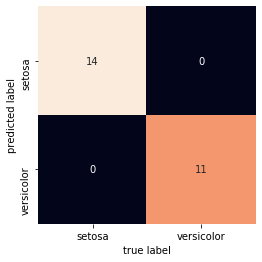

In [14]:
from sklearn.metrics import confusion_matrix
labels = ['setosa', 'versicolor'] 
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

## ROC Curve

The receiver operating characteristic(ROC) curve is a common tool to determine the performance of the classifier. The dotted line represents the ROC curve of a purely random classifier. A good classifier stays as far away from that line as possible (toward the top-left corner).

<center>
<img src="images/roc-curve-v2.png" alt="roc-curve">
</center>

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC(y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

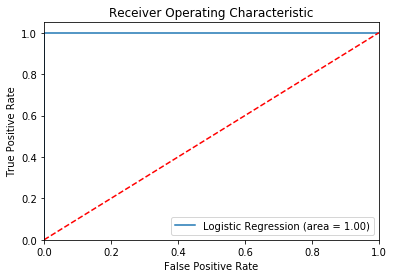

In [16]:
plot_ROC(y_test, y_pred)

# Section 2.2: More complicated example
In this part, we see an example of a classification problem that needs more preprocessing. We learn how to use categorical data to predict labels. Remember, preprocessing is not the primary purpose of this notebook, but it is a chance to become more familiar with this important part of data analysis.

**About dataset:** the dataset is the loan data from the lending club. The lending club is a US peer-peer lending company that enables borrowers to create unsecured personal loans between 1,000 and 40,000. Our goal is to predict if a customer will pay back his/her loan. The data is from 2007–2010. To predicting the variable not.fully.paid, we will use the following independent variables available to us in the data set as shown below:

<img src="images/Capture.PNG" >


In [17]:
loan = pd.read_csv('loan_data.csv')

In [18]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


As you see in below, there is 29  missing value in revol.util column. We have two options here:



    1.remove these samples from our dataset.  
    2.fill missings value in a way that affects less our dataset. For example, if our data is time series, we can fill the         missing value using the mean of its vicinity samples.
    
    
In our case, because 29 samples are a small group of our dataset, we can remove them, but also we can fill the missing values with the median value in the revol.util column, because it is less sensitive to outliers in comparison to mean.


In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9549 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [20]:
loan['revol.util'].fillna(loan['revol.util'].median(), inplace=True)
len(loan['revol.util'])

9578

In [21]:
target_count = loan['not.fully.paid'].value_counts(dropna=False) #deropna remove missing values
target_count

0    8045
1    1533
Name: not.fully.paid, dtype: int64

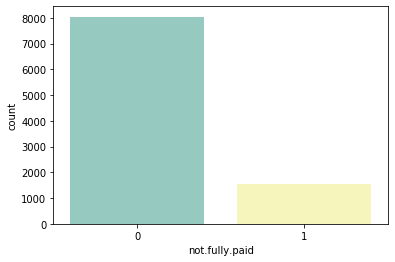

In [22]:
sns.countplot(x='not.fully.paid', data=loan, palette="Set3")
plt.show()

The plotted data indicated that our target value is clearly imbalanced at ratio 8:1. The lack of balance makes our model greatly disadvantaged. For solving this problem, we use an upsampling method. But first, let's look at the original data and visualize it to develop some intuition about data. 

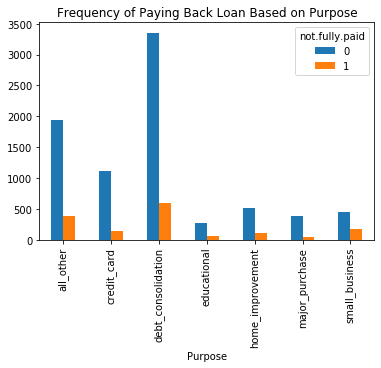

In [23]:
pd.crosstab(loan['purpose'],loan['not.fully.paid']).plot(kind='bar')
plt.title('Frequency of Paying Back Loan Based on Purpose')
plt.xlabel('Purpose')
plt.show()

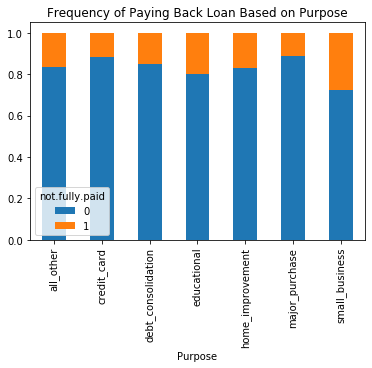

In [24]:
table = pd.crosstab(loan['purpose'],loan['not.fully.paid'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frequency of Paying Back Loan Based on Purpose')
plt.xlabel('Purpose')
plt.show()

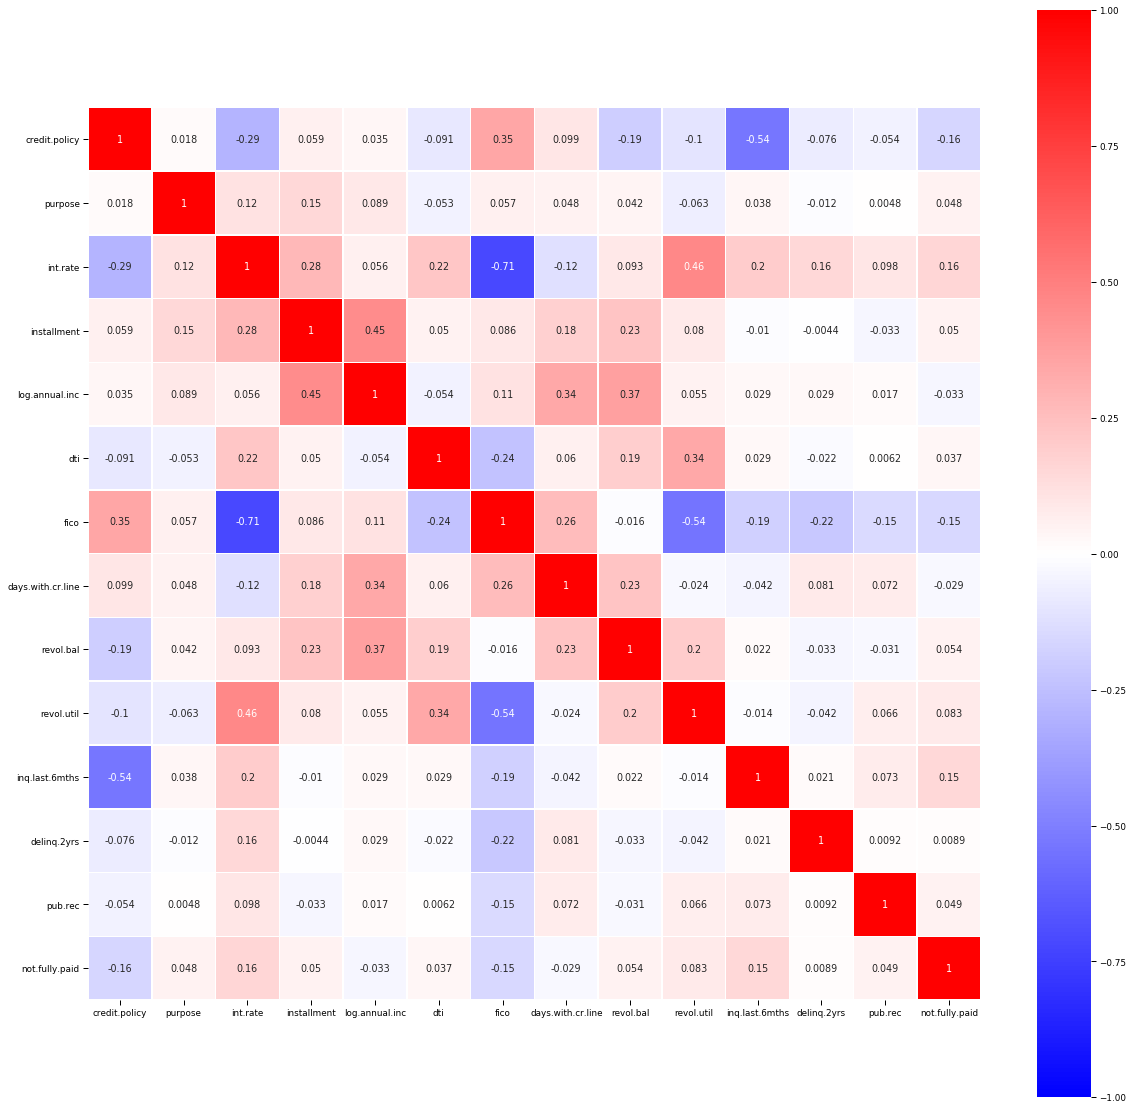

In [25]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(loan.assign(purpose=loan.purpose.astype('category').cat.codes,).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()

In [26]:
#loan.drop(['int.rate'], axis=1, inplace = True)

In [27]:
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import PolynomialFeaturesfrom, StandardScaler, OneHotEncoder

## Preprocessing



In [28]:
categorical_features = ['purpose'] #dummy variable

categorical_transformer = Pipeline(steps=[('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])

In [29]:
numeric_features = ['credit.policy','int.rate','installment','log.annual.inc','dti','fico',
                    'days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec'] #dummy variable

numeric_transformer = Pipeline(steps=[('poly',preprocessing.PolynomialFeatures(degree = 2)),
                                      ('scaler', preprocessing.StandardScaler())])

In [30]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Splitting Data

In [31]:
Y = loan.loc[:,'not.fully.paid']
X = loan.drop(['not.fully.paid'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Fitting the Model

In [32]:
smt = SMOTE(random_state=42)
lor = LogisticRegression(max_iter= 2000)

In [33]:
classifier = Pipeline([('preprocessor', preprocessor),('smt', smt), ('lor', LogisticRegression())])
classifier.fit(X_train, y_train);
y_pred = classifier.predict(X_test)

In [34]:
print("The accuracy of model is {0:0.2f} ".format((accuracy_score(y_test, y_pred))))

The accuracy of model is 0.64 


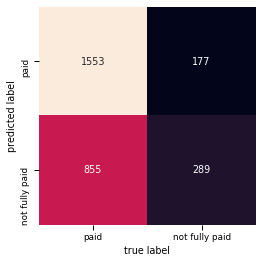

In [35]:
labels = ['paid', 'not fully paid']
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      2408
           1       0.25      0.62      0.36       466

    accuracy                           0.64      2874
   macro avg       0.58      0.63      0.55      2874
weighted avg       0.79      0.64      0.69      2874



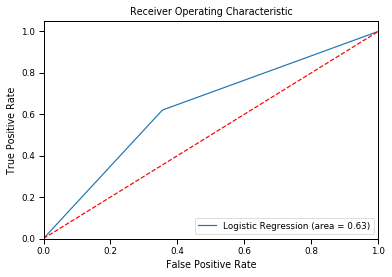

In [37]:
plot_ROC(y_test, y_pred)